In this series we'll be using the following packages:

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

To convert a Series object of date-like objects we can use the to_datetime function.

In [19]:
pd.to_datetime(pd.Series(['Sep 24, 1979', '2014-05-08']))

0   1979-09-24
1   2014-05-08
dtype: datetime64[ns]

In many cases the easiest way is more to associate objects with a time span.

In [7]:
periods = pd.PeriodIndex([pd.Period("2015-02"), pd.Period("2015-04"), pd.Period("2015-06")])
periods

<class 'pandas.tseries.period.PeriodIndex'>
[2015-02, ..., 2015-06]
Length: 3, Freq: M

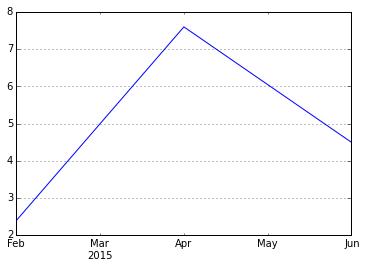

In [8]:
info = pd.Series([2.4,7.6,4.5],periods)
info.plot()

If we need timestamps on a regular frequency, we can use the pandas functions date_range. In this case the frequency of the data is one month (freq='M'). 

In [14]:
Months = pd.date_range("2013-10", "2015-01", freq = "M")
Months

<class 'pandas.tseries.index.DatetimeIndex'>
[2013-10-31, ..., 2014-12-31]
Length: 15, Freq: M, Timezone: None

We can use it with a table of prices

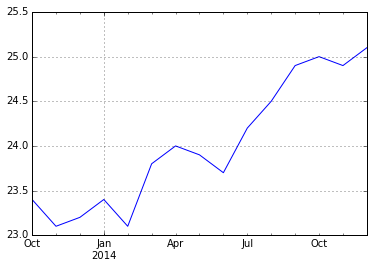

In [15]:
Prices = np.array([23.4,23.1, 23.2, 23.4,23.1,23.8,24,23.9,23.7,24.2,24.5,24.9,25,24.9,25.1])
info = pd.Series(Prices, index=Months)
info.plot()

We can select a time span between march and september

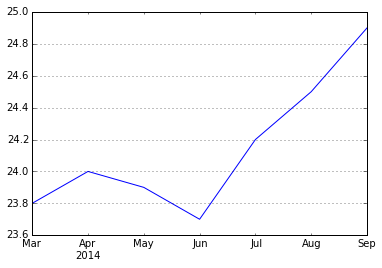

In [16]:
info["2014-03":"2014-09"].plot()

We can access a specific value

In [17]:
info["2013"]

2013-10-31    23.4
2013-11-30    23.1
2013-12-31    23.2
Freq: M, dtype: float64

In [13]:
info["2014-06"]

2014-06-30    23.8
Freq: M, dtype: float64

Now on we'll be using the yahoo API for python, and explore a more practical example

In [1]:
from yahoo_finance import Share

Stock prices (Apple) between '2014-04-27' and '2014-04-29'

In [3]:
yahoo = Share("AAPL")
data = yahoo.get_historical('2014-04-27', '2014-04-29')
data

[{'Adj_Close': '82.6974',
  'Close': '592.32996',
  'Date': '2014-04-29',
  'High': '595.97998',
  'Low': '589.51001',
  'Open': '593.73999',
  'Symbol': 'AAPL',
  'Volume': '84344400'},
 {'Adj_Close': '82.94313',
  'Close': '594.09003',
  'Date': '2014-04-28',
  'High': '595.75',
  'Low': '572.55005',
  'Open': '572.79999',
  'Symbol': 'AAPL',
  'Volume': '167371400'}]

Plotting data for the time span between '2014-03-01' and '2014-04-29'

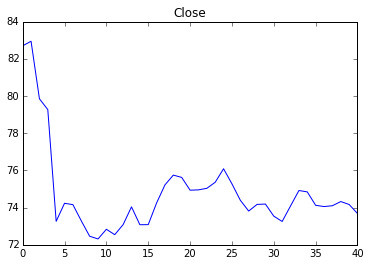

In [4]:
data = yahoo.get_historical('2014-03-01', '2014-04-29')
Close_values = []
for value in data:
    Close_values.append(value["Adj_Close"])
plt.plot(Close_values)
plt.title("Close")
plt.show()

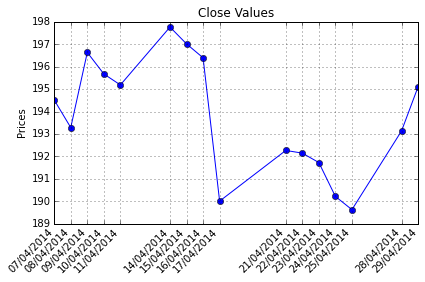

In [23]:
import datetime
import matplotlib.dates as mdates

def yahoo():
    yahoo = Share("IBM")
    data = yahoo.get_historical('2014-04-05', '2014-04-29')
    return data

def DataFr():
    yahoo_data = yahoo()
    pandas_data = pd.DataFrame(columns = ["Adj_Close", "Close", "Date", "High", "Low", "Open", "Symbol", "Volume"])
    for i in range(len(yahoo_data)):
        pandas_data = pandas_data.append({"Adj_Close":yahoo_data[i]["Adj_Close"],
                                "Close":yahoo_data[i]["Close"], 
                                "Date": yahoo_data[i]["Date"],
                                "High": yahoo_data[i]["High"],
                                "Low": yahoo_data[i]["Low"],
                                "Open": yahoo_data[i]["Open"],
                                "Symbol": yahoo_data[i]["Symbol"],
                                "Volume": yahoo_data[i]["Volume"],
                               }, ignore_index=True)
        
    return pandas_data

def time_series():
    
    pandas_data = DataFr()
    
    Days = pandas_data["Date"]
    Dates = [datetime.datetime.strptime(day, '%Y-%m-%d') for day in Days]
    Close_Values = pandas_data["Close"]
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xticks(Dates)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

    ax.plot_date(Dates, Close_Values, ls='-', marker='o')
    ax.set_title('Close Values')
    ax.set_ylabel('Prices')
    ax.grid(True)

    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()

    fig.show()
    
time_series()

Prices variation on the same time span

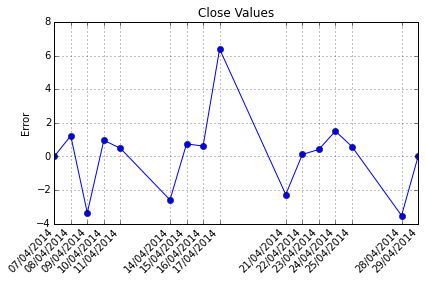

In [26]:
def time_series_error():
    
    pandas_data = DataFr()
        
    Days = pandas_data["Date"]
    Dates = [datetime.datetime.strptime(day, '%Y-%m-%d') for day in Days]
    Close_Values = pandas_data["Close"].astype(float)
    
    error=np.zeros(len(Close_Values))

    try:
        for i in np.arange(1,len(Close_Values),1):
            error[i] = Close_Values[i+1] - Close_Values[i]
    except Exception as e:
        pass

    error
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xticks(Dates)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

    ax.plot_date(Dates, error, ls='-', marker='o')
    ax.set_title('Close Values')
    ax.set_ylabel('Error')
    ax.grid(True)

    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()

    fig.show()
    
time_series_error()